In [46]:
import numpy as np
import random
import sys
import nltk
import re
from nltk.tokenize import TreebankWordTokenizer
from nltk.book import  FreqDist
from nltk.lm.preprocessing import padded_everygram_pipeline
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt


Using TensorFlow backend.


' we were onnnnn aaaaa bbbbrrrreeeeeaaaakkkk ! '

In [2]:
def concatenate(text1,text2,text3):
    result = []
    for w in text1:
        result.append(w)
    for w in text2:
        result.append(w)
    for w in text3:
        result.append(w)
    return result

In [16]:
#print(re.findall(r'“.*”','Plato quotes Showing 1-30 of 1,332 “Be kind, for everyone you meet is fighting a harder battle.” ― Plato tags: attributed-no-source, compassion, kindness 9653 likes'))


filename = "plato1.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
#print(raw_text[0:1000])
Quotes = re.findall(r'“.*”',raw_text)
most_openning_words = []

tokenizer = TreebankWordTokenizer()
Datasets = []
#most_openning_words = []

for quote in Quotes:
    orginal = quote
    sents = nltk.sent_tokenize(orginal[1:-1])
    words = tokenizer.tokenize_sents(sents)
    Datasets.append(words)

#print(orginal,'\n')
#print(sents,'\n')
#print(words,'\n')

#print( Datasets[:5],'\n')
words = [token for quote in Datasets for sent in quote for token in sent]
most_openning_words = [quote[0][0] for quote in Datasets]
#print(words[:50],'\n')
#print(set(most_openning_words))

print(len(FreqDist(words)),'\n')
print(len(set(words)),'\n')
print(len(raw_text),'\n')

print(FreqDist(words).most_common(2000))

sliding_window_size = 10
padding_first = ['<S>' for i in range(0,sliding_window_size - 1)]
padding_first.append('“')
padding_end = ['”','</S>']

Updated_Datasets = []
for quote in Datasets:
    flatten = [token for sent in quote for token in sent]
    
    out = concatenate(padding_first,flatten,padding_end)
    Updated_Datasets.append(out)
    
#print(Datasets[50],'\n')
#print(Updated_Datasets[50],'\n')
Updated_Datasets[50][1:10].copy()
#print(Updated_Datasets[50:70])

5117 

5117 

352983 

[(',', 3375), ('the', 2821), ('and', 2148), ('of', 1863), ('to', 1464), ('.', 1433), ('is', 1308), ('a', 904), ('in', 798), ('that', 777), ('he', 626), ('be', 601), ('not', 593), ('i', 522), (';', 514), ('they', 450), ('as', 429), ('for', 425), ('are', 424), ('which', 417), ('you', 405), ('but', 385), ('or', 380), ('it', 355), ('will', 323), ('who', 320), ('have', 300), ('?', 276), ('one', 270), ('all', 266), ('we', 260), ('if', 259), ('by', 258), ('them', 247), ('with', 247), ('his', 231), ('their', 227), ('this', 227), ('what', 214), ('man', 214), ('from', 212), ('good', 208), ('when', 202), ('there', 196), ('no', 192), ('do', 184), ('has', 184), ('men', 165), ('at', 162), ('then', 159), ('than', 155), ('can', 153), ('other', 152), (':', 150), ('him', 147), ('would', 140), ('any', 134), ('only', 129), ('said', 123), ('true', 123), ('know', 119), ('being', 119), ('state', 119), ('was', 116), ('must', 114), ('more', 113), ('because', 110), ('life', 110), ('into',

['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“']

In [17]:
Train_set = []
for quote in Updated_Datasets:
    for i in range(0, len(quote) - sliding_window_size):
        X = quote[i:i+sliding_window_size]
        Y = quote[i+sliding_window_size]
        #print(X)
        Train_set.append((X.copy(),Y))
for quote in Train_set:
    print(quote)
print(len(Train_set))

(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“'], 'be')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'be'], 'kind')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'be', 'kind'], ',')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'be', 'kind', ','], 'for')
(['<S>', '<S>', '<S>', '<S>', '<S>', '“', 'be', 'kind', ',', 'for'], 'everyone')
(['<S>', '<S>', '<S>', '<S>', '“', 'be', 'kind', ',', 'for', 'everyone'], 'you')
(['<S>', '<S>', '<S>', '“', 'be', 'kind', ',', 'for', 'everyone', 'you'], 'meet')
(['<S>', '<S>', '“', 'be', 'kind', ',', 'for', 'everyone', 'you', 'meet'], 'is')
(['<S>', '“', 'be', 'kind', ',', 'for', 'everyone', 'you', 'meet', 'is'], 'fighting')
(['“', 'be', 'kind', ',', 'for', 'everyone', 'you', 'meet', 'is', 'fighting'], 'a')
(['be', 'kind', ',', 'for', 'everyone', 'you', 'meet', 'is', 'fighting', 'a'], 'harder')
(['kind', ',', 'for', 'everyone', 'you', 'meet', 'is', 'fighting', 'a', 'harder'], 'battle')
([',', 'for', 'e

(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'a'], 'dog')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'a', 'dog'], 'has')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'a', 'dog', 'has'], 'the')
(['<S>', '<S>', '<S>', '<S>', '<S>', '“', 'a', 'dog', 'has', 'the'], 'soul')
(['<S>', '<S>', '<S>', '<S>', '“', 'a', 'dog', 'has', 'the', 'soul'], 'of')
(['<S>', '<S>', '<S>', '“', 'a', 'dog', 'has', 'the', 'soul', 'of'], 'a')
(['<S>', '<S>', '“', 'a', 'dog', 'has', 'the', 'soul', 'of', 'a'], 'philosopher')
(['<S>', '“', 'a', 'dog', 'has', 'the', 'soul', 'of', 'a', 'philosopher'], '.')
(['“', 'a', 'dog', 'has', 'the', 'soul', 'of', 'a', 'philosopher', '.'], '”')
(['a', 'dog', 'has', 'the', 'soul', 'of', 'a', 'philosopher', '.', '”'], '</S>')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“'], 'that')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'that'], "'s")
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'that', "'s

(['tries', 'to', 'lead', 'them', 'to', 'it', ',', 'and', 'who', 'can'], 'see')
(['to', 'lead', 'them', 'to', 'it', ',', 'and', 'who', 'can', 'see'], 'many')
(['lead', 'them', 'to', 'it', ',', 'and', 'who', 'can', 'see', 'many'], 'moral')
(['them', 'to', 'it', ',', 'and', 'who', 'can', 'see', 'many', 'moral'], 'actions')
(['to', 'it', ',', 'and', 'who', 'can', 'see', 'many', 'moral', 'actions'], ',')
(['it', ',', 'and', 'who', 'can', 'see', 'many', 'moral', 'actions', ','], 'but')
([',', 'and', 'who', 'can', 'see', 'many', 'moral', 'actions', ',', 'but'], 'not')
(['and', 'who', 'can', 'see', 'many', 'moral', 'actions', ',', 'but', 'not'], 'morality')
(['who', 'can', 'see', 'many', 'moral', 'actions', ',', 'but', 'not', 'morality'], 'itself')
(['can', 'see', 'many', 'moral', 'actions', ',', 'but', 'not', 'morality', 'itself'], ',')
(['see', 'many', 'moral', 'actions', ',', 'but', 'not', 'morality', 'itself', ','], 'and')
(['many', 'moral', 'actions', ',', 'but', 'not', 'morality', 'itsel

([',', 'and', 'the', 'island', 'of', 'atlantis', 'in', 'like', 'manner', 'disappeared'], 'in')
(['and', 'the', 'island', 'of', 'atlantis', 'in', 'like', 'manner', 'disappeared', 'in'], 'the')
(['the', 'island', 'of', 'atlantis', 'in', 'like', 'manner', 'disappeared', 'in', 'the'], 'depths')
(['island', 'of', 'atlantis', 'in', 'like', 'manner', 'disappeared', 'in', 'the', 'depths'], 'of')
(['of', 'atlantis', 'in', 'like', 'manner', 'disappeared', 'in', 'the', 'depths', 'of'], 'the')
(['atlantis', 'in', 'like', 'manner', 'disappeared', 'in', 'the', 'depths', 'of', 'the'], 'sea')
(['in', 'like', 'manner', 'disappeared', 'in', 'the', 'depths', 'of', 'the', 'sea'], '.')
(['like', 'manner', 'disappeared', 'in', 'the', 'depths', 'of', 'the', 'sea', '.'], 'for')
(['manner', 'disappeared', 'in', 'the', 'depths', 'of', 'the', 'sea', '.', 'for'], 'which')
(['disappeared', 'in', 'the', 'depths', 'of', 'the', 'sea', '.', 'for', 'which'], 'reason')
(['in', 'the', 'depths', 'of', 'the', 'sea', '.', '

(['is', 'rich', ',', 'and', 'is', 'disappointed', 'of', 'his', 'gains', 'because'], 'he')
(['rich', ',', 'and', 'is', 'disappointed', 'of', 'his', 'gains', 'because', 'he'], 'turns')
([',', 'and', 'is', 'disappointed', 'of', 'his', 'gains', 'because', 'he', 'turns'], 'out')
(['and', 'is', 'disappointed', 'of', 'his', 'gains', 'because', 'he', 'turns', 'out'], 'to')
(['is', 'disappointed', 'of', 'his', 'gains', 'because', 'he', 'turns', 'out', 'to'], 'be')
(['disappointed', 'of', 'his', 'gains', 'because', 'he', 'turns', 'out', 'to', 'be'], 'poor')
(['of', 'his', 'gains', 'because', 'he', 'turns', 'out', 'to', 'be', 'poor'], ',')
(['his', 'gains', 'because', 'he', 'turns', 'out', 'to', 'be', 'poor', ','], 'is')
(['gains', 'because', 'he', 'turns', 'out', 'to', 'be', 'poor', ',', 'is'], 'disgraced')
(['because', 'he', 'turns', 'out', 'to', 'be', 'poor', ',', 'is', 'disgraced'], 'all')
(['he', 'turns', 'out', 'to', 'be', 'poor', ',', 'is', 'disgraced', 'all'], 'the')
(['turns', 'out', 'to

(['would', 'be', 'ready', 'to', 'die', 'a', 'thousand', 'deaths', 'rather', 'than'], 'endure')
(['be', 'ready', 'to', 'die', 'a', 'thousand', 'deaths', 'rather', 'than', 'endure'], 'this')
(['ready', 'to', 'die', 'a', 'thousand', 'deaths', 'rather', 'than', 'endure', 'this'], '.')
(['to', 'die', 'a', 'thousand', 'deaths', 'rather', 'than', 'endure', 'this', '.'], 'or')
(['die', 'a', 'thousand', 'deaths', 'rather', 'than', 'endure', 'this', '.', 'or'], 'who')
(['a', 'thousand', 'deaths', 'rather', 'than', 'endure', 'this', '.', 'or', 'who'], 'would')
(['thousand', 'deaths', 'rather', 'than', 'endure', 'this', '.', 'or', 'who', 'would'], 'desert')
(['deaths', 'rather', 'than', 'endure', 'this', '.', 'or', 'who', 'would', 'desert'], 'his')
(['rather', 'than', 'endure', 'this', '.', 'or', 'who', 'would', 'desert', 'his'], 'beloved')
(['than', 'endure', 'this', '.', 'or', 'who', 'would', 'desert', 'his', 'beloved'], 'or')
(['endure', 'this', '.', 'or', 'who', 'would', 'desert', 'his', 'belo

(['evil', 'is', 'greater', 'than', 'the', 'good', '.', 'and', 'so', 'when'], 'men')
(['is', 'greater', 'than', 'the', 'good', '.', 'and', 'so', 'when', 'men'], 'have')
(['greater', 'than', 'the', 'good', '.', 'and', 'so', 'when', 'men', 'have'], 'both')
(['than', 'the', 'good', '.', 'and', 'so', 'when', 'men', 'have', 'both'], 'done')
(['the', 'good', '.', 'and', 'so', 'when', 'men', 'have', 'both', 'done'], 'and')
(['good', '.', 'and', 'so', 'when', 'men', 'have', 'both', 'done', 'and'], 'suffered')
(['.', 'and', 'so', 'when', 'men', 'have', 'both', 'done', 'and', 'suffered'], 'injustice')
(['and', 'so', 'when', 'men', 'have', 'both', 'done', 'and', 'suffered', 'injustice'], 'and')
(['so', 'when', 'men', 'have', 'both', 'done', 'and', 'suffered', 'injustice', 'and'], 'have')
(['when', 'men', 'have', 'both', 'done', 'and', 'suffered', 'injustice', 'and', 'have'], 'had')
(['men', 'have', 'both', 'done', 'and', 'suffered', 'injustice', 'and', 'have', 'had'], 'experience')
(['have', 'both

([',', 'provided', 'it', 'comes', 'as', 'the', 'gift', 'of', 'heaven', ','], 'is')
(['provided', 'it', 'comes', 'as', 'the', 'gift', 'of', 'heaven', ',', 'is'], 'the')
(['it', 'comes', 'as', 'the', 'gift', 'of', 'heaven', ',', 'is', 'the'], 'channel')
(['comes', 'as', 'the', 'gift', 'of', 'heaven', ',', 'is', 'the', 'channel'], 'by')
(['as', 'the', 'gift', 'of', 'heaven', ',', 'is', 'the', 'channel', 'by'], 'which')
(['the', 'gift', 'of', 'heaven', ',', 'is', 'the', 'channel', 'by', 'which'], 'we')
(['gift', 'of', 'heaven', ',', 'is', 'the', 'channel', 'by', 'which', 'we'], 'receive')
(['of', 'heaven', ',', 'is', 'the', 'channel', 'by', 'which', 'we', 'receive'], 'the')
(['heaven', ',', 'is', 'the', 'channel', 'by', 'which', 'we', 'receive', 'the'], 'greatest')
([',', 'is', 'the', 'channel', 'by', 'which', 'we', 'receive', 'the', 'greatest'], 'blessings')
(['is', 'the', 'channel', 'by', 'which', 'we', 'receive', 'the', 'greatest', 'blessings'], '.')
(['the', 'channel', 'by', 'which', '

(['i', 'was', 'not', 'mistaken', ',', 'for', 'they', 'did', 'know', 'many'], 'things')
(['was', 'not', 'mistaken', ',', 'for', 'they', 'did', 'know', 'many', 'things'], 'of')
(['not', 'mistaken', ',', 'for', 'they', 'did', 'know', 'many', 'things', 'of'], 'which')
(['mistaken', ',', 'for', 'they', 'did', 'know', 'many', 'things', 'of', 'which'], 'i')
([',', 'for', 'they', 'did', 'know', 'many', 'things', 'of', 'which', 'i'], 'was')
(['for', 'they', 'did', 'know', 'many', 'things', 'of', 'which', 'i', 'was'], 'ignorant')
(['they', 'did', 'know', 'many', 'things', 'of', 'which', 'i', 'was', 'ignorant'], ',')
(['did', 'know', 'many', 'things', 'of', 'which', 'i', 'was', 'ignorant', ','], 'and')
(['know', 'many', 'things', 'of', 'which', 'i', 'was', 'ignorant', ',', 'and'], 'in')
(['many', 'things', 'of', 'which', 'i', 'was', 'ignorant', ',', 'and', 'in'], 'this')
(['things', 'of', 'which', 'i', 'was', 'ignorant', ',', 'and', 'in', 'this'], 'they')
(['of', 'which', 'i', 'was', 'ignorant', 

(['and', 'unable', 'to', 'hold', 'out', 'singly', 'against', 'the', 'savagery', 'of'], 'all')
(['unable', 'to', 'hold', 'out', 'singly', 'against', 'the', 'savagery', 'of', 'all'], '.')
(['to', 'hold', 'out', 'singly', 'against', 'the', 'savagery', 'of', 'all', '.'], '”')
(['hold', 'out', 'singly', 'against', 'the', 'savagery', 'of', 'all', '.', '”'], '</S>')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“'], 'those')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'those'], 'who')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'those', 'who'], 'reproach')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'those', 'who', 'reproach'], 'injustice')
(['<S>', '<S>', '<S>', '<S>', '<S>', '“', 'those', 'who', 'reproach', 'injustice'], 'do')
(['<S>', '<S>', '<S>', '<S>', '“', 'those', 'who', 'reproach', 'injustice', 'do'], 'so')
(['<S>', '<S>', '<S>', '“', 'those', 'who', 'reproach', 'injustice', 'do', 'so'], 'because')
(['<S>', '<S>', '“', 'those', 

(['in', 'what', 'way', 'something', 'they', 'desire', 'can', 'exist', ',', 'put'], 'that')
(['what', 'way', 'something', 'they', 'desire', 'can', 'exist', ',', 'put', 'that'], 'question')
(['way', 'something', 'they', 'desire', 'can', 'exist', ',', 'put', 'that', 'question'], 'aside')
(['something', 'they', 'desire', 'can', 'exist', ',', 'put', 'that', 'question', 'aside'], 'so')
(['they', 'desire', 'can', 'exist', ',', 'put', 'that', 'question', 'aside', 'so'], 'they')
(['desire', 'can', 'exist', ',', 'put', 'that', 'question', 'aside', 'so', 'they'], 'won’t')
(['can', 'exist', ',', 'put', 'that', 'question', 'aside', 'so', 'they', 'won’t'], 'grow')
(['exist', ',', 'put', 'that', 'question', 'aside', 'so', 'they', 'won’t', 'grow'], 'weary')
([',', 'put', 'that', 'question', 'aside', 'so', 'they', 'won’t', 'grow', 'weary'], 'deliberating')
(['put', 'that', 'question', 'aside', 'so', 'they', 'won’t', 'grow', 'weary', 'deliberating'], 'about')
(['that', 'question', 'aside', 'so', 'they',

([',', 'and', 'over', 'parts', 'of', 'the', 'continent', ',', 'and', ','], 'furthermore')
(['and', 'over', 'parts', 'of', 'the', 'continent', ',', 'and', ',', 'furthermore'], ',')
(['over', 'parts', 'of', 'the', 'continent', ',', 'and', ',', 'furthermore', ','], 'the')
(['parts', 'of', 'the', 'continent', ',', 'and', ',', 'furthermore', ',', 'the'], 'men')
(['of', 'the', 'continent', ',', 'and', ',', 'furthermore', ',', 'the', 'men'], 'of')
(['the', 'continent', ',', 'and', ',', 'furthermore', ',', 'the', 'men', 'of'], 'atlantis')
(['continent', ',', 'and', ',', 'furthermore', ',', 'the', 'men', 'of', 'atlantis'], 'had')
([',', 'and', ',', 'furthermore', ',', 'the', 'men', 'of', 'atlantis', 'had'], 'subjected')
(['and', ',', 'furthermore', ',', 'the', 'men', 'of', 'atlantis', 'had', 'subjected'], 'the')
([',', 'furthermore', ',', 'the', 'men', 'of', 'atlantis', 'had', 'subjected', 'the'], 'parts')
(['furthermore', ',', 'the', 'men', 'of', 'atlantis', 'had', 'subjected', 'the', 'parts']

(['to', 'silence', 'me', ',', 'silence', 'philosophy', ',', 'who', 'is', 'my'], 'love')
(['silence', 'me', ',', 'silence', 'philosophy', ',', 'who', 'is', 'my', 'love'], '.')
(['me', ',', 'silence', 'philosophy', ',', 'who', 'is', 'my', 'love', '.'], '”')
([',', 'silence', 'philosophy', ',', 'who', 'is', 'my', 'love', '.', '”'], '</S>')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“'], 'a')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'a'], 'philosopher')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'a', 'philosopher'], 'has')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'a', 'philosopher', 'has'], 'the')
(['<S>', '<S>', '<S>', '<S>', '<S>', '“', 'a', 'philosopher', 'has', 'the'], 'moderate')
(['<S>', '<S>', '<S>', '<S>', '“', 'a', 'philosopher', 'has', 'the', 'moderate'], 'love')
(['<S>', '<S>', '<S>', '“', 'a', 'philosopher', 'has', 'the', 'moderate', 'love'], 'for')
(['<S>', '<S>', '“', 'a', 'philosopher', 'has', 'the', 'moderate

(['the', 'wives', 'of', 'the', 'guardians—to', 'that', 'point', 'we', 'come', 'round'], 'again')
(['wives', 'of', 'the', 'guardians—to', 'that', 'point', 'we', 'come', 'round', 'again'], '.')
(['of', 'the', 'guardians—to', 'that', 'point', 'we', 'come', 'round', 'again', '.'], 'certainly')
(['the', 'guardians—to', 'that', 'point', 'we', 'come', 'round', 'again', '.', 'certainly'], 'not')
(['guardians—to', 'that', 'point', 'we', 'come', 'round', 'again', '.', 'certainly', 'not'], '.')
(['that', 'point', 'we', 'come', 'round', 'again', '.', 'certainly', 'not', '.'], 'the')
(['point', 'we', 'come', 'round', 'again', '.', 'certainly', 'not', '.', 'the'], 'law')
(['we', 'come', 'round', 'again', '.', 'certainly', 'not', '.', 'the', 'law'], 'which')
(['come', 'round', 'again', '.', 'certainly', 'not', '.', 'the', 'law', 'which'], 'we')
(['round', 'again', '.', 'certainly', 'not', '.', 'the', 'law', 'which', 'we'], 'then')
(['again', '.', 'certainly', 'not', '.', 'the', 'law', 'which', 'we', 

(['the', 'yoke', 'of', 'the', 'barbarians', '?', 'to', 'spare', 'them', 'is'], 'infinitely')
(['yoke', 'of', 'the', 'barbarians', '?', 'to', 'spare', 'them', 'is', 'infinitely'], 'better')
(['of', 'the', 'barbarians', '?', 'to', 'spare', 'them', 'is', 'infinitely', 'better'], '.')
(['the', 'barbarians', '?', 'to', 'spare', 'them', 'is', 'infinitely', 'better', '.'], 'then')
(['barbarians', '?', 'to', 'spare', 'them', 'is', 'infinitely', 'better', '.', 'then'], 'no')
(['?', 'to', 'spare', 'them', 'is', 'infinitely', 'better', '.', 'then', 'no'], 'hellene')
(['to', 'spare', 'them', 'is', 'infinitely', 'better', '.', 'then', 'no', 'hellene'], 'should')
(['spare', 'them', 'is', 'infinitely', 'better', '.', 'then', 'no', 'hellene', 'should'], 'be')
(['them', 'is', 'infinitely', 'better', '.', 'then', 'no', 'hellene', 'should', 'be'], 'owned')
(['is', 'infinitely', 'better', '.', 'then', 'no', 'hellene', 'should', 'be', 'owned'], 'by')
(['infinitely', 'better', '.', 'then', 'no', 'hellene', 

([',', 'or', 'in', 'any', 'other', 'body', ',', 'that', 'body', 'is'], ',')
(['or', 'in', 'any', 'other', 'body', ',', 'that', 'body', 'is', ','], 'to')
(['in', 'any', 'other', 'body', ',', 'that', 'body', 'is', ',', 'to'], 'begin')
(['any', 'other', 'body', ',', 'that', 'body', 'is', ',', 'to', 'begin'], 'with')
(['other', 'body', ',', 'that', 'body', 'is', ',', 'to', 'begin', 'with'], ',')
(['body', ',', 'that', 'body', 'is', ',', 'to', 'begin', 'with', ','], 'rendered')
([',', 'that', 'body', 'is', ',', 'to', 'begin', 'with', ',', 'rendered'], 'incapable')
(['that', 'body', 'is', ',', 'to', 'begin', 'with', ',', 'rendered', 'incapable'], 'of')
(['body', 'is', ',', 'to', 'begin', 'with', ',', 'rendered', 'incapable', 'of'], 'united')
(['is', ',', 'to', 'begin', 'with', ',', 'rendered', 'incapable', 'of', 'united'], 'action')
([',', 'to', 'begin', 'with', ',', 'rendered', 'incapable', 'of', 'united', 'action'], 'by')
(['to', 'begin', 'with', ',', 'rendered', 'incapable', 'of', 'united

(['“', 'they', 'say', 'also', 'that', 'honesty', 'is', 'for', 'the', 'most'], 'part')
(['they', 'say', 'also', 'that', 'honesty', 'is', 'for', 'the', 'most', 'part'], 'less')
(['say', 'also', 'that', 'honesty', 'is', 'for', 'the', 'most', 'part', 'less'], 'profitable')
(['also', 'that', 'honesty', 'is', 'for', 'the', 'most', 'part', 'less', 'profitable'], 'than')
(['that', 'honesty', 'is', 'for', 'the', 'most', 'part', 'less', 'profitable', 'than'], 'dishonesty')
(['honesty', 'is', 'for', 'the', 'most', 'part', 'less', 'profitable', 'than', 'dishonesty'], ';')
(['is', 'for', 'the', 'most', 'part', 'less', 'profitable', 'than', 'dishonesty', ';'], 'and')
(['for', 'the', 'most', 'part', 'less', 'profitable', 'than', 'dishonesty', ';', 'and'], 'they')
(['the', 'most', 'part', 'less', 'profitable', 'than', 'dishonesty', ';', 'and', 'they'], 'are')
(['most', 'part', 'less', 'profitable', 'than', 'dishonesty', ';', 'and', 'they', 'are'], 'quite')
(['part', 'less', 'profitable', 'than', 'dish

(['of', 'retaliation', ';', 'and', 'justice', ',', 'being', 'at', 'a', 'middle'], 'point')
(['retaliation', ';', 'and', 'justice', ',', 'being', 'at', 'a', 'middle', 'point'], 'between')
([';', 'and', 'justice', ',', 'being', 'at', 'a', 'middle', 'point', 'between'], 'the')
(['and', 'justice', ',', 'being', 'at', 'a', 'middle', 'point', 'between', 'the'], 'two')
(['justice', ',', 'being', 'at', 'a', 'middle', 'point', 'between', 'the', 'two'], ',')
([',', 'being', 'at', 'a', 'middle', 'point', 'between', 'the', 'two', ','], 'is')
(['being', 'at', 'a', 'middle', 'point', 'between', 'the', 'two', ',', 'is'], 'tolerated')
(['at', 'a', 'middle', 'point', 'between', 'the', 'two', ',', 'is', 'tolerated'], 'not')
(['a', 'middle', 'point', 'between', 'the', 'two', ',', 'is', 'tolerated', 'not'], 'as')
(['middle', 'point', 'between', 'the', 'two', ',', 'is', 'tolerated', 'not', 'as'], 'a')
(['point', 'between', 'the', 'two', ',', 'is', 'tolerated', 'not', 'as', 'a'], 'good')
(['between', 'the',

(['<S>', '“', 'philosophy', 'begins', 'in', 'wonder', '.', "''", '-plato', '”'], '</S>')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“'], 'then')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'then'], 'god')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'then', 'god'], ',')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'then', 'god', ','], 'if')
(['<S>', '<S>', '<S>', '<S>', '<S>', '“', 'then', 'god', ',', 'if'], 'he')
(['<S>', '<S>', '<S>', '<S>', '“', 'then', 'god', ',', 'if', 'he'], 'be')
(['<S>', '<S>', '<S>', '“', 'then', 'god', ',', 'if', 'he', 'be'], 'good')
(['<S>', '<S>', '“', 'then', 'god', ',', 'if', 'he', 'be', 'good'], ',')
(['<S>', '“', 'then', 'god', ',', 'if', 'he', 'be', 'good', ','], 'is')
(['“', 'then', 'god', ',', 'if', 'he', 'be', 'good', ',', 'is'], 'not')
(['then', 'god', ',', 'if', 'he', 'be', 'good', ',', 'is', 'not'], 'the')
(['god', ',', 'if', 'he', 'be', 'good', ',', 'is', 'not', 'the'], 'author')
([',', 'i

(['desire', 'only', 'to', 'know', 'the', 'truth', ',', 'and', 'to', 'live'], 'as')
(['only', 'to', 'know', 'the', 'truth', ',', 'and', 'to', 'live', 'as'], 'well')
(['to', 'know', 'the', 'truth', ',', 'and', 'to', 'live', 'as', 'well'], 'as')
(['know', 'the', 'truth', ',', 'and', 'to', 'live', 'as', 'well', 'as'], 'i')
(['the', 'truth', ',', 'and', 'to', 'live', 'as', 'well', 'as', 'i'], 'can')
(['truth', ',', 'and', 'to', 'live', 'as', 'well', 'as', 'i', 'can'], ',')
([',', 'and', 'to', 'live', 'as', 'well', 'as', 'i', 'can', ','], 'and')
(['and', 'to', 'live', 'as', 'well', 'as', 'i', 'can', ',', 'and'], ',')
(['to', 'live', 'as', 'well', 'as', 'i', 'can', ',', 'and', ','], 'when')
(['live', 'as', 'well', 'as', 'i', 'can', ',', 'and', ',', 'when'], 'i')
(['as', 'well', 'as', 'i', 'can', ',', 'and', ',', 'when', 'i'], 'die')
(['well', 'as', 'i', 'can', ',', 'and', ',', 'when', 'i', 'die'], ',')
(['as', 'i', 'can', ',', 'and', ',', 'when', 'i', 'die', ','], 'to')
(['i', 'can', ',', 'an

([',', 'and', 'see', 'the', 'light', 'of', 'the', 'sun', '.', '”'], '</S>')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“'], 'wise')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'wise'], 'men')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'wise', 'men'], 'talk')
(['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“', 'wise', 'men', 'talk'], 'because')
(['<S>', '<S>', '<S>', '<S>', '<S>', '“', 'wise', 'men', 'talk', 'because'], 'they')
(['<S>', '<S>', '<S>', '<S>', '“', 'wise', 'men', 'talk', 'because', 'they'], 'have')
(['<S>', '<S>', '<S>', '“', 'wise', 'men', 'talk', 'because', 'they', 'have'], 'something')
(['<S>', '<S>', '“', 'wise', 'men', 'talk', 'because', 'they', 'have', 'something'], 'to')
(['<S>', '“', 'wise', 'men', 'talk', 'because', 'they', 'have', 'something', 'to'], 'say')
(['“', 'wise', 'men', 'talk', 'because', 'they', 'have', 'something', 'to', 'say'], '.')
(['wise', 'men', 'talk', 'because', 'they', 'have', 'something', 'to

(['in', 'that', 'life', 'alone', ',', 'when', 'he', 'looks', 'at', 'beauty'], 'in')
(['that', 'life', 'alone', ',', 'when', 'he', 'looks', 'at', 'beauty', 'in'], 'the')
(['life', 'alone', ',', 'when', 'he', 'looks', 'at', 'beauty', 'in', 'the'], 'only')
(['alone', ',', 'when', 'he', 'looks', 'at', 'beauty', 'in', 'the', 'only'], 'way')
([',', 'when', 'he', 'looks', 'at', 'beauty', 'in', 'the', 'only', 'way'], 'what')
(['when', 'he', 'looks', 'at', 'beauty', 'in', 'the', 'only', 'way', 'what'], 'beauty')
(['he', 'looks', 'at', 'beauty', 'in', 'the', 'only', 'way', 'what', 'beauty'], 'can')
(['looks', 'at', 'beauty', 'in', 'the', 'only', 'way', 'what', 'beauty', 'can'], 'be')
(['at', 'beauty', 'in', 'the', 'only', 'way', 'what', 'beauty', 'can', 'be'], 'seen')
(['beauty', 'in', 'the', 'only', 'way', 'what', 'beauty', 'can', 'be', 'seen'], '-')
(['in', 'the', 'only', 'way', 'what', 'beauty', 'can', 'be', 'seen', '-'], 'only')
(['the', 'only', 'way', 'what', 'beauty', 'can', 'be', 'seen', 

(['said', ',', 'is', 'deemed', 'happy', 'in', 'receiving', 'a', 'part', 'only'], 'of')
([',', 'is', 'deemed', 'happy', 'in', 'receiving', 'a', 'part', 'only', 'of'], 'the')
(['is', 'deemed', 'happy', 'in', 'receiving', 'a', 'part', 'only', 'of', 'the'], 'blessedness')
(['deemed', 'happy', 'in', 'receiving', 'a', 'part', 'only', 'of', 'the', 'blessedness'], 'which')
(['happy', 'in', 'receiving', 'a', 'part', 'only', 'of', 'the', 'blessedness', 'which'], 'is')
(['in', 'receiving', 'a', 'part', 'only', 'of', 'the', 'blessedness', 'which', 'is'], 'secured')
(['receiving', 'a', 'part', 'only', 'of', 'the', 'blessedness', 'which', 'is', 'secured'], 'to')
(['a', 'part', 'only', 'of', 'the', 'blessedness', 'which', 'is', 'secured', 'to'], 'our')
(['part', 'only', 'of', 'the', 'blessedness', 'which', 'is', 'secured', 'to', 'our'], 'citizens')
(['only', 'of', 'the', 'blessedness', 'which', 'is', 'secured', 'to', 'our', 'citizens'], ',')
(['of', 'the', 'blessedness', 'which', 'is', 'secured', 'to

(['this', 'trifling', 'particular', ',', 'then', ',', 'i', 'appear', 'to', 'be'], 'wiser')
(['trifling', 'particular', ',', 'then', ',', 'i', 'appear', 'to', 'be', 'wiser'], 'than')
(['particular', ',', 'then', ',', 'i', 'appear', 'to', 'be', 'wiser', 'than'], 'he')
([',', 'then', ',', 'i', 'appear', 'to', 'be', 'wiser', 'than', 'he'], ',')
(['then', ',', 'i', 'appear', 'to', 'be', 'wiser', 'than', 'he', ','], 'because')
([',', 'i', 'appear', 'to', 'be', 'wiser', 'than', 'he', ',', 'because'], 'i')
(['i', 'appear', 'to', 'be', 'wiser', 'than', 'he', ',', 'because', 'i'], 'do')
(['appear', 'to', 'be', 'wiser', 'than', 'he', ',', 'because', 'i', 'do'], 'not')
(['to', 'be', 'wiser', 'than', 'he', ',', 'because', 'i', 'do', 'not'], 'fancy')
(['be', 'wiser', 'than', 'he', ',', 'because', 'i', 'do', 'not', 'fancy'], 'i')
(['wiser', 'than', 'he', ',', 'because', 'i', 'do', 'not', 'fancy', 'i'], 'know')
(['than', 'he', ',', 'because', 'i', 'do', 'not', 'fancy', 'i', 'know'], 'what')
(['he', ',

(['hold', 'in', 'all', 'cases', 'hasn’t', 'troubled', 'me', 'from', 'time', 'to'], 'time')
(['in', 'all', 'cases', 'hasn’t', 'troubled', 'me', 'from', 'time', 'to', 'time'], '.')
(['all', 'cases', 'hasn’t', 'troubled', 'me', 'from', 'time', 'to', 'time', '.'], 'then')
(['cases', 'hasn’t', 'troubled', 'me', 'from', 'time', 'to', 'time', '.', 'then'], ',')
(['hasn’t', 'troubled', 'me', 'from', 'time', 'to', 'time', '.', 'then', ','], 'when')
(['troubled', 'me', 'from', 'time', 'to', 'time', '.', 'then', ',', 'when'], 'i')
(['me', 'from', 'time', 'to', 'time', '.', 'then', ',', 'when', 'i'], 'get')
(['from', 'time', 'to', 'time', '.', 'then', ',', 'when', 'i', 'get'], 'bogged')
(['time', 'to', 'time', '.', 'then', ',', 'when', 'i', 'get', 'bogged'], 'down')
(['to', 'time', '.', 'then', ',', 'when', 'i', 'get', 'bogged', 'down'], 'in')
(['time', '.', 'then', ',', 'when', 'i', 'get', 'bogged', 'down', 'in'], 'that')
(['.', 'then', ',', 'when', 'i', 'get', 'bogged', 'down', 'in', 'that'], ',

(['or', 'perhaps', 'some', 'other', 'purveyor', 'to', 'our', 'bodily', 'wants', '?'], 'quite')
(['perhaps', 'some', 'other', 'purveyor', 'to', 'our', 'bodily', 'wants', '?', 'quite'], 'right')
(['some', 'other', 'purveyor', 'to', 'our', 'bodily', 'wants', '?', 'quite', 'right'], '.')
(['other', 'purveyor', 'to', 'our', 'bodily', 'wants', '?', 'quite', 'right', '.'], 'the')
(['purveyor', 'to', 'our', 'bodily', 'wants', '?', 'quite', 'right', '.', 'the'], 'barest')
(['to', 'our', 'bodily', 'wants', '?', 'quite', 'right', '.', 'the', 'barest'], 'notion')
(['our', 'bodily', 'wants', '?', 'quite', 'right', '.', 'the', 'barest', 'notion'], 'of')
(['bodily', 'wants', '?', 'quite', 'right', '.', 'the', 'barest', 'notion', 'of'], 'a')
(['wants', '?', 'quite', 'right', '.', 'the', 'barest', 'notion', 'of', 'a'], 'state')
(['?', 'quite', 'right', '.', 'the', 'barest', 'notion', 'of', 'a', 'state'], 'must')
(['quite', 'right', '.', 'the', 'barest', 'notion', 'of', 'a', 'state', 'must'], 'include')

(['and', 'so', 'at', 'last', ',', 'instead', 'of', 'loving', 'contention', 'and'], 'glory')
(['so', 'at', 'last', ',', 'instead', 'of', 'loving', 'contention', 'and', 'glory'], ',')
(['at', 'last', ',', 'instead', 'of', 'loving', 'contention', 'and', 'glory', ','], 'men')
(['last', ',', 'instead', 'of', 'loving', 'contention', 'and', 'glory', ',', 'men'], 'become')
([',', 'instead', 'of', 'loving', 'contention', 'and', 'glory', ',', 'men', 'become'], 'lovers')
(['instead', 'of', 'loving', 'contention', 'and', 'glory', ',', 'men', 'become', 'lovers'], 'of')
(['of', 'loving', 'contention', 'and', 'glory', ',', 'men', 'become', 'lovers', 'of'], 'trade')
(['loving', 'contention', 'and', 'glory', ',', 'men', 'become', 'lovers', 'of', 'trade'], 'and')
(['contention', 'and', 'glory', ',', 'men', 'become', 'lovers', 'of', 'trade', 'and'], 'money')
(['and', 'glory', ',', 'men', 'become', 'lovers', 'of', 'trade', 'and', 'money'], ';')
(['glory', ',', 'men', 'become', 'lovers', 'of', 'trade', 'an

(['can', 'not', 'enquire', 'either', 'about', 'that', 'which', 'he', 'knows', ','], 'or')
(['not', 'enquire', 'either', 'about', 'that', 'which', 'he', 'knows', ',', 'or'], 'about')
(['enquire', 'either', 'about', 'that', 'which', 'he', 'knows', ',', 'or', 'about'], 'that')
(['either', 'about', 'that', 'which', 'he', 'knows', ',', 'or', 'about', 'that'], 'which')
(['about', 'that', 'which', 'he', 'knows', ',', 'or', 'about', 'that', 'which'], 'he')
(['that', 'which', 'he', 'knows', ',', 'or', 'about', 'that', 'which', 'he'], 'does')
(['which', 'he', 'knows', ',', 'or', 'about', 'that', 'which', 'he', 'does'], 'not')
(['he', 'knows', ',', 'or', 'about', 'that', 'which', 'he', 'does', 'not'], 'know')
(['knows', ',', 'or', 'about', 'that', 'which', 'he', 'does', 'not', 'know'], ';')
([',', 'or', 'about', 'that', 'which', 'he', 'does', 'not', 'know', ';'], 'for')
(['or', 'about', 'that', 'which', 'he', 'does', 'not', 'know', ';', 'for'], 'if')
(['about', 'that', 'which', 'he', 'does', 'not

(['twilight', 'world', 'of', 'change', 'and', 'decay', ',', 'it', 'can', 'only'], 'form')
(['world', 'of', 'change', 'and', 'decay', ',', 'it', 'can', 'only', 'form'], 'opinions')
(['of', 'change', 'and', 'decay', ',', 'it', 'can', 'only', 'form', 'opinions'], ',')
(['change', 'and', 'decay', ',', 'it', 'can', 'only', 'form', 'opinions', ','], 'its')
(['and', 'decay', ',', 'it', 'can', 'only', 'form', 'opinions', ',', 'its'], 'vision')
(['decay', ',', 'it', 'can', 'only', 'form', 'opinions', ',', 'its', 'vision'], 'is')
([',', 'it', 'can', 'only', 'form', 'opinions', ',', 'its', 'vision', 'is'], 'confused')
(['it', 'can', 'only', 'form', 'opinions', ',', 'its', 'vision', 'is', 'confused'], 'and')
(['can', 'only', 'form', 'opinions', ',', 'its', 'vision', 'is', 'confused', 'and'], 'its')
(['only', 'form', 'opinions', ',', 'its', 'vision', 'is', 'confused', 'and', 'its'], 'opinions')
(['form', 'opinions', ',', 'its', 'vision', 'is', 'confused', 'and', 'its', 'opinions'], 'shifting')
(['o

(['of', 'conversation', 'grow', ';', 'therefore', ',', 'do', 'not', 'stop', 'accompanying'], 'these')
(['conversation', 'grow', ';', 'therefore', ',', 'do', 'not', 'stop', 'accompanying', 'these'], 'young')
(['grow', ';', 'therefore', ',', 'do', 'not', 'stop', 'accompanying', 'these', 'young'], 'people')
([';', 'therefore', ',', 'do', 'not', 'stop', 'accompanying', 'these', 'young', 'people'], 'and')
(['therefore', ',', 'do', 'not', 'stop', 'accompanying', 'these', 'young', 'people', 'and'], 'coming')
([',', 'do', 'not', 'stop', 'accompanying', 'these', 'young', 'people', 'and', 'coming'], 'here')
(['do', 'not', 'stop', 'accompanying', 'these', 'young', 'people', 'and', 'coming', 'here'], 'with')
(['not', 'stop', 'accompanying', 'these', 'young', 'people', 'and', 'coming', 'here', 'with'], 'us')
(['stop', 'accompanying', 'these', 'young', 'people', 'and', 'coming', 'here', 'with', 'us'], ',')
(['accompanying', 'these', 'young', 'people', 'and', 'coming', 'here', 'with', 'us', ','], 'as

In [6]:
l = ['fdf','trrr','uiu','detr','jho']
lc = l[2:4].copy()
['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“'].copy()

['<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '<S>', '“']

In [7]:
Vocs = set(words)
len(Vocs)

5117

In [18]:
def get_One_Hot_Encoder(sliding_window_size,vector_length,words,train_set):
    fd = FreqDist(words)
    
    INT_WORD_DIC = {i:word[0] for i,word in enumerate(fd.most_common(vector_length - 1))}
    WORD_INT_DIC = {word[0]:i for i,word in enumerate(fd.most_common(vector_length - 1))}
    Selected_Vocs = [word[0] for i,word in enumerate(fd.most_common(vector_length - 1))]
    WORD_INT_DIC['</UNKNOWN>'] = vector_length - 1
    INT_WORD_DIC[vector_length - 1] = '</UNKNOWN>'
    
    X_Train = np.zeros((len(train_set), sliding_window_size, vector_length), dtype=np.bool)
    Y_Train = np.zeros((len(train_set), vector_length), dtype=np.bool)
    
    for  (i,currentS) in enumerate(train_set):
        j=0 
        #print(nextW)
        for word in enumerate(currentS[0]):
            if word[1] in Selected_Vocs:
                #print('W to I : ',WORD_INT_DIC[word])
                #print('word : ',word)
                X_Train[i, j, WORD_INT_DIC[word[1]]] = 1
            else :
                #print('word : ',word)
                #print('W to I Unk : ',WORD_INT_DIC['</UNKNOWN>'])
                X_Train[i, j, WORD_INT_DIC['</UNKNOWN>']] = 1
            j+=1
        if currentS[1] in Selected_Vocs:
            Y_Train[i, WORD_INT_DIC[currentS[1]]] = 1
        else :
            Y_Train[i, WORD_INT_DIC['</UNKNOWN>']] = 1
        
    
    #print(X_Train.shape)
    #print(Y_Train.shape)

    #print(Y_Train[0:10])
    
    return INT_WORD_DIC, WORD_INT_DIC ,X_Train,Y_Train

In [20]:
#print(Train_set[0])
#for  (currentS,nextW) in enumerate(Train_set):
    #print(nextW[0])
Vec_Size = 2000
INT_WORD_DIC, WORD_INT_DIC,X_Train,Y_Train  = get_One_Hot_Encoder(sliding_window_size,Vec_Size,
                                                  [w for quote in Updated_Datasets for w in quote],
                                                  Train_set)
print(X_Train[0])

[[ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [ True False False ... False False False]
 [ True False False ... False False False]
 [False False False ... False False False]]


In [44]:
# test
def NuOfTr(Vec):
    N = 0
    for Bo in Vec:
        if(Bo == True):
            N +=1
    return N
print(Train_set[9090])
print( WORD_INT_DIC["n't"])
print(NuOfTr(Y_Train[9090]))
print(X_Train[9090,6,27])
print(Y_Train[9090,150])



(['ought', ',', 'and', 'to', 'be', 'with', 'it', '?', 'or', 'have'], "n't")
150
1
True
True


In [35]:
T = [([1,2,3,4,5,6,7,8],1),([2,3,4,5,6,7,8],2),([3,4,5,6,7,8,9],3),([9,8,7,6,5,4],5)]
for i,quote in enumerate(T):
    print(i,'\n',quote[0],'\n',quote[1])

0 
 [1, 2, 3, 4, 5, 6, 7, 8] 
 1
1 
 [2, 3, 4, 5, 6, 7, 8] 
 2
2 
 [3, 4, 5, 6, 7, 8, 9] 
 3
3 
 [9, 8, 7, 6, 5, 4] 
 5


In [36]:
#ex = np.zeros((50000, 10, 5000), dtype=np.bool)

In [47]:
# model

model = Sequential()
model.add(LSTM(128, input_shape=(sliding_window_size, Vec_Size)))
model.add(Dense(Vec_Size, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               1090048   
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              258000    
Total params: 1,348,048
Trainable params: 1,348,048
Non-trainable params: 0
_________________________________________________________________


In [50]:
filepath="saved_weights/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

#callbacks_list = [checkpoint]


# Fit the model

history = model.fit(X_Train,Y_Train,
          batch_size=128,
          epochs=50)

#model.save('my_saved_weights_jungle_book_50epochs.h5')

Epoch 1/50
56560/56560 [==============================] - 58s 1ms/step - loss: 4.4334
Epoch 2/50
56560/56560 [==============================] - 59s 1ms/step - loss: 4.1679
Epoch 3/50
56560/56560 [==============================] - 58s 1ms/step - loss: 3.9649
Epoch 4/50
56560/56560 [==============================] - 59s 1ms/step - loss: 3.7786
Epoch 5/50
56560/56560 [==============================] - 59s 1ms/step - loss: 3.5817
Epoch 6/50
56560/56560 [==============================] - 59s 1ms/step - loss: 3.3478
Epoch 7/50
56560/56560 [==============================] - 59s 1ms/step - loss: 3.1060
Epoch 8/50
56560/56560 [==============================] - 59s 1ms/step - loss: 2.9078
Epoch 9/50
56560/56560 [==============================] - 59s 1ms/step - loss: 2.7178
Epoch 10/50
56560/56560 [==============================] - 59s 1ms/step - loss: 2.5635
Epoch 11/50
56560/56560 [==============================] - 59s 1ms/step - loss: 2.4278
Epoch 12/50
56560/56560 [===========================

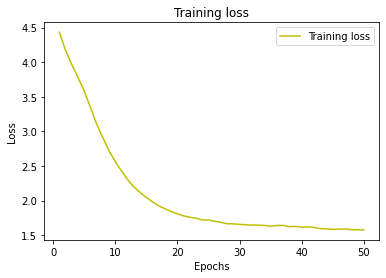

In [51]:
# plot
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) 
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1) 
    return np.argmax(probas)

In [53]:
#filename = "my_saved_weights_jungle_book_50epochs.h5"
#model.load_weights(filename)



In [61]:
print(set(most_openning_words))
openning_word = input('enter opining word : ')
out = concatenate(padding_first[1:],[openning_word],[])
Generated_Qoute = [padding_first[-1],openning_word]


fd = FreqDist([w for quote in Updated_Datasets for w in quote])

INT_WORD_DIC = {i:word[0] for i,word in enumerate(fd.most_common( Vec_Size - 1))}
WORD_INT_DIC = {word[0]:i for i,word in enumerate(fd.most_common( Vec_Size - 1))}
Selected_Vocs = [word[0] for i,word in enumerate(fd.most_common( Vec_Size - 1))]

WORD_INT_DIC['</UNKNOWN>'] =  Vec_Size - 1
INT_WORD_DIC[ Vec_Size - 1] = '</UNKNOWN>'

Predict = '</BLANK>'


while(Predict != '</S>'): 
        Predict_Seq = np.zeros((1, sliding_window_size, Vec_Size))
        j=0 
        #print(nextW)
        for word in enumerate(out):
            if word[1] in Selected_Vocs:
                #print('W to I : ',WORD_INT_DIC[word])
                #print('word : ',word)
                Predict_Seq[0, j, WORD_INT_DIC[word[1]]] = 1
            else:
                #print('word : ',word)
                #print('W to I Unk : ',WORD_INT_DIC['</UNKNOWN>'])
                Predict_Seq[0, j, WORD_INT_DIC['</UNKNOWN>']] = 1
            j+=1
        
        Coded_Predict = model.predict(Predict_Seq, verbose=0)[0]
        Next_Word_Index = sample(Coded_Predict)
        Next_Word = INT_WORD_DIC[Next_Word_Index]

        Generated_Qoute.append(Next_Word)
        out = out[1:]
        out.append(Next_Word)
        print(Next_Word)
sys.stdout.write(Generated_Qoute)
sys.stdout.flush()



{'will', 'crito', 'eat', 'mean', 'habit', 'calligraphy', 'everything', 'truth', 'no', '..they', 'appearance', 'is', 'consider', 'misanthropy', 'state', 'the', 'states', 'honesty', ':', 'bodily', 'see', 'renouncing', 'opinion', 'whenever', 'next', 'nevertheless', 'why', 'as', 'meno', 'therefore', 'of', '…a', 'he', 'poets', 'to', 'la', 'a', 'how', '..it', 'music', 'unless', 'never', 'isn’t', 'it’s', 'well', 'let', 'tell', 'swans', 'and', 'hence', 'wonder', 'man', 'or', 'time', 'on', 'any', 'desires', 'human', 'knowledge', 'you', 'simonides', 'people', 'itself', 'from', '«poderoso', 'noticing', 'many', 'please', 'conversation', 'justice', 'similarly', 'both', 'si', 'herein', 'lack', 'pleasure', 'when', 'beauty', 'listen', 'thinking', 'like', 'i', 'there', 'poetry', 'chaos', 'education', 'repeating', 'first', '-so', 'now', 'gymnastic', 'since', 'whereas', 'can', 'thither', 'philosophical', 'seeing', 'false', 'evil', 'even', '\u200cآwhat', 'all', 'repetitions', 'they', 'strange', 'come', 'a

.
is
quite
not
under
that
there
no
shameful
can
you
only
,
even
a
state
?
i
give
how
how
even
well
,
as
you
have
;
for
that
is
an
</UNKNOWN>
below
divine
be
to
</UNKNOWN>
,
and
not
these
us
have
?
either
</UNKNOWN>
to
thinking
that
really
we
shall
i
suppose
that
”
</S>
,
i
am
those
;
harm
ought
his
</UNKNOWN>
</UNKNOWN>
of
the
because
thing
to
</UNKNOWN>
from
</UNKNOWN>
what
because
are
?
how
in
.
no
one
who
is
not
of
own
she
that
is
,
or
to
say
,
she
is
common
to
the
.
that
not-being
is
the
between
that
all
the
under
the
greatest
between
the
and
human
what
them
power
in
private
about
the
power
,
come
the
citizens
of
together
up
possession
may
i
say
that
of
compelled
who
is
in
first
</UNKNOWN>
interests
of
the
we
</UNKNOWN>
to
what
when
one
is
</UNKNOWN>
only
not
stand
his
</UNKNOWN>
son
,
or
power
it
practice
to
yet
it
has
desires
true
compelled
to
fear
single
and
if
</UNKNOWN>
very
</UNKNOWN>
the
likes
athens
together
,
that
have
now
comes
</UNKNOWN>
full
in
sort
of
known
,
in
fear
,

then
n't
i
am
within
for
it
's
wise
experience
,
for
by
any
</UNKNOWN>
he
makes
on
its
happiness
to
and
</UNKNOWN>
else
the
in
person
and
than
from
.
”
</S>
)
,
have
nothing
not
how
to
yet
you
.
from
”
</S>
,
one
not
have
the
</UNKNOWN>
</UNKNOWN>
as
bodily
by
</UNKNOWN>
?
”
</S>
,
knowing
but
at
justice
.
having
</UNKNOWN>
the
wisdom
of
love
is
not
a
</UNKNOWN>
?
”
</S>
spirit
.
begin
.
also
the
...
shall
be
is
</UNKNOWN>
...
out
,
there
can
be
willing
to
go
in
any
greater
evil
to
be
private
good
it
master
to
the
greatest
and
that
which
is
not
for
the
way
of
.
against
it
is
but
he
being
thing
and
he
who
are
made
because
a
done
</UNKNOWN>
...
whereas
in
many
,
he
learning
do
you
know
it
</UNKNOWN>
;
how
can
not
be
ready
to
do
a
to
god
?
and
then
so
,
did
from
be
by
again
</UNKNOWN>
wants
to
i
have
did
</UNKNOWN>
rather
”
</S>
,
injustice
and
not
now
saying
</UNKNOWN>
,
and
the
other
well
believe
,
?
this
is
these
,
if
</UNKNOWN>
they
women
?
you
this
what
they
</UNKNOWN>
run
also
lover

the
</UNKNOWN>
against
the
</UNKNOWN>
of
</UNKNOWN>
,
and
--
the
when
possession
of
him
,
is
not
the
wants
who
can
justice
is
gods
unjust
and
marriage
,
still
the
laws
and
have
?
”
</S>
their
</UNKNOWN>
</UNKNOWN>
</UNKNOWN>
against
even
now
our
</UNKNOWN>
to
no
education
has
,
not
the
very
slave
of
the
”
</S>
still
first
:
say
now
again
</UNKNOWN>
yet
</UNKNOWN>
nature
together
</UNKNOWN>
unrighteousness
;
for
i
was
right
,
he
</UNKNOWN>
about
was
,
and
if
necessity
money
is
its
good
each
first
</UNKNOWN>
what
ought
found
to
learn
,
as
to
be
desire
and
thinks
to
do
n't
must
from
things
things
he
it
.
”
</S>
,
as
further
</UNKNOWN>
wise
?
as
of
which
he
would
know
the
against
very
spirit
,
and
will
be
her
</UNKNOWN>
,
in
principle
to
he
you
not
therefore
was
have
wise
</UNKNOWN>
man
has
you
do
n't
if
we
not
just
and
down
,
i
said
,
to
how
greater
to
the
because
of
our
wise
as
answer
.
that
is
”
</S>
</UNKNOWN>
life
human
not
,
everything
so
everyone
dear
its
natures
.
”
</S>
there
noth

”
</S>
,
</UNKNOWN>
that
you
asked
,
such
according
to
my
though
,
any
at
them
</UNKNOWN>
imagine
homer
:
those
us
are
not
why
temperance
''
each
how
strong
is
and
</UNKNOWN>
youth
,
men
there
is
are
action
.
”
</S>
:
this
</UNKNOWN>
gathered
any
one
riches
”
</S>
,
easily
</UNKNOWN>
</UNKNOWN>
have
</UNKNOWN>
</UNKNOWN>
a
and
</UNKNOWN>
of
the
laws
,
and
</UNKNOWN>
that
many
.
we
had
which
is
to
,
it
is
</UNKNOWN>
,
and
years
,
you
]
to
the
</UNKNOWN>
of
the
universe
philosopher
form
an
fact
,
</UNKNOWN>
,
we
can
could
whom
it
</UNKNOWN>
two
,
on
thought
course
times
.
bodily
”
</S>
only
</UNKNOWN>
those
everyone
making
say
ask
if
i
do
not
know
live
way
:
in
dead
this
greater
but
than
think
them
many
?
”
</S>
this
.
how
can
you
say
,
the
not
you
speak
equally
but
remember
is
wonder
is
you
for
the
friend
which
we
political
our
;
work
's
education
has
is
a
will
wise
</UNKNOWN>
is
by
wise
and
?
you
would
shall
only
put
a
</UNKNOWN>
to
do
you
have
not
in
image
place
,
but
not
would
you
my

when
said
is
afraid
reality
it
different
.
because
the
it
was
at
all
we
.
”
</S>
god
,
quite
then
,
appear
pay
divine
into
no
,
back
from
him
rational
time
to
the
</UNKNOWN>
of
laws
and
his
</UNKNOWN>
very
at
first
,
be
has
youth
spirit
to
part
it
of
what
power
gods
and
and
old
,
but
's
learning
and
we
never
</UNKNOWN>
him
on
which
the
other
hand
,
doubt
time
as
love
,
by
...
bad
,
an
</UNKNOWN>
my
virtue
;
right
in
must
that
the
man
of
soul
which
was
citizens
,
but
people
are
immortal
and
than
we
which
,
it
seem
to
o
injustice
and
philosopher
.
the
great
</UNKNOWN>
but
that
he
</UNKNOWN>
is
who
has
socrates
friend
(
until
best
like
to
be
</UNKNOWN>
of
you
are
moment
”
</S>
there
can
ready
to
think
believed
too
enter
</UNKNOWN>
a
</UNKNOWN>
at
but
like
with
men
who
are
their
such
.
immortal
,
what
is
all
people
,
suppose
than
:
to
do
beautiful
,
among
?
better
i
am
taking
the
time
and
will
they
therefore
their
god
”
</S>
little
and
</UNKNOWN>
.
”
</S>
let
them
to
</UNKNOWN>
when
first


to
</UNKNOWN>
simplicity
question
of
a
manner
which
have
greatest
in
them
,
philosophers
speak
the
only
must
those
youth
in
which
an
</UNKNOWN>
</UNKNOWN>
that
which
is
</UNKNOWN>
by
question
,
he
</UNKNOWN>
?
certain
no
woman
i
could
not
the
present
,
you
ask
to
you
in
my
deeds
until
</UNKNOWN>
a
any
one
who
would
have
instead
of
mankind
?
</UNKNOWN>
in
a
great
</UNKNOWN>
,
and
am
are
not
.
.
you
do
it
is
called
in
knowledge
company
”
</S>
.
proceed
in
only
beginning
kind
.
say
just
better
price
has
is
sense
how
having
either
for
the
case
of
the
with
;
that
the
has
will
neither
the
</UNKNOWN>
of
the
riches
which
i
too
</UNKNOWN>
,
go
which
men
women
must
to
see
the
same
</UNKNOWN>
his
something
.
beautiful
is
this
.
but
the
of
two
</UNKNOWN>
</UNKNOWN>
is
having
better
unjust
;
their
to
an
done
be
good
he
is
whether
and
</UNKNOWN>
,
what
he
has
made
an
</UNKNOWN>
to
</UNKNOWN>
to
it
begins
to
they
case
there
are
bad
another
.
and
”
</S>
who
is
every
</UNKNOWN>
those
where
being
is
out

KeyboardInterrupt: 

In [18]:
print(np.argmax([3,4,5,6,7,8,7,5,4,3,2,1]))

5


In [58]:
a = [1,2,3,4]
print(a)
a = a[1:]
print(a)

[1, 2, 3, 4]
[2, 3, 4]
